In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("/content/survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [6]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [21]:
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [22]:
print(df.isnull().sum().sum())

0


In [25]:
print(df.describe())

           GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count  309.000000  309.000000  309.000000      309.000000  309.000000   
mean     0.524272   62.673139    1.563107        1.569579    1.498382   
std      0.500221    8.210301    0.496806        0.495938    0.500808   
min      0.000000   21.000000    1.000000        1.000000    1.000000   
25%      0.000000   57.000000    1.000000        1.000000    1.000000   
50%      1.000000   62.000000    2.000000        2.000000    1.000000   
75%      1.000000   69.000000    2.000000        2.000000    2.000000   
max      1.000000   87.000000    2.000000        2.000000    2.000000   

       PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count     309.000000       309.000000  309.000000  309.000000  309.000000   
mean        1.501618         1.504854    1.673139    1.556634    1.556634   
std         0.500808         0.500787    0.469827    0.497588    0.497588   
min         1.000000         1.000

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [26]:
encoder = LabelEncoder()
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [28]:
print(df.dtypes)

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object


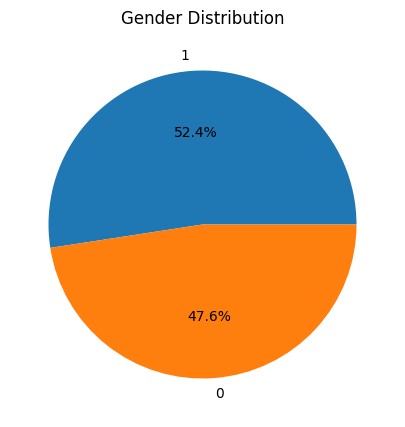

In [29]:
plt.figure(figsize=(10, 5))
plt.pie(df['GENDER'].value_counts(), labels=df['GENDER'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

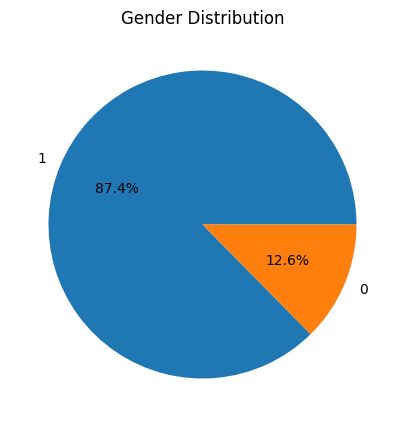

In [30]:
plt.figure(figsize=(10, 5))
plt.pie(df['LUNG_CANCER'].value_counts(), labels=df['LUNG_CANCER'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

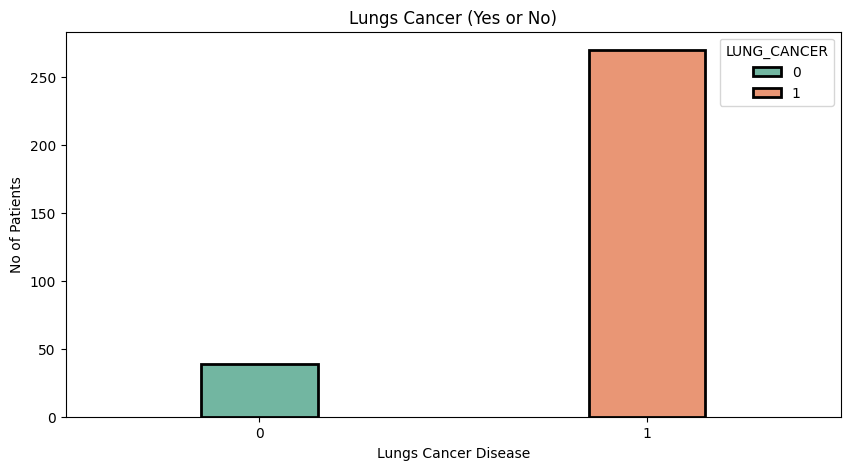

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='LUNG_CANCER', data = df, palette='Set2', hue='LUNG_CANCER', edgecolor='black', linewidth=2, width=0.3)
plt.xlabel('Lungs Cancer Disease')
plt.ylabel('No of Patients')
plt.title('Lungs Cancer (Yes or No)')
plt.show()

<Axes: >

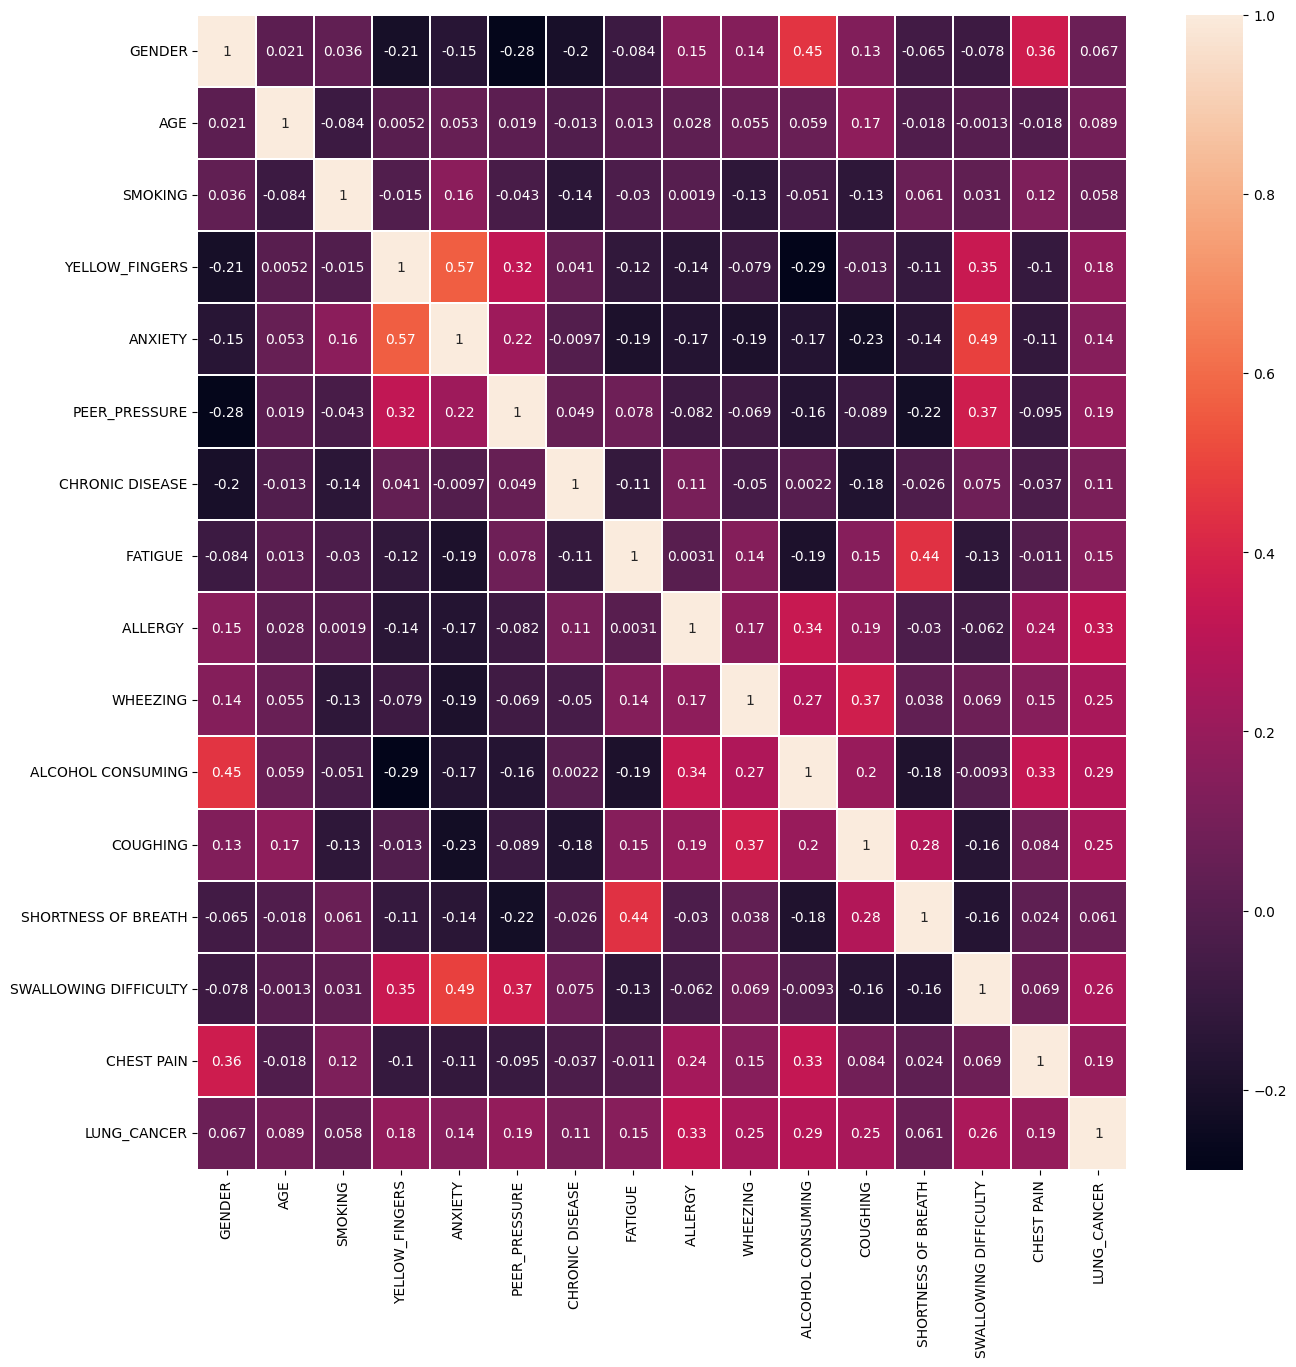

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)

In [41]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9032258064516129
Precision: 0.9285714285714286
Recall: 0.9629629629629629
F1 Score: 0.9454545454545454
Confusion Matrix:
 [[ 4  4]
 [ 2 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.93      0.96      0.95        54

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



In [42]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"OvR Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

OvR Accuracy: 0.90
Confusion Matrix:
 [[ 4  4]
 [ 2 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.93      0.96      0.95        54

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



In [44]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"SoftMax Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

SoftMax Accuracy: 0.92
Confusion Matrix:
 [[ 5  3]
 [ 2 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.95      0.96      0.95        54

    accuracy                           0.92        62
   macro avg       0.83      0.79      0.81        62
weighted avg       0.92      0.92      0.92        62




Cross-validation scores on all features:
[0.9        0.92       0.89795918 0.89795918 0.95918367]
Mean CV Accuracy (All Features): 0.9150

Accuracy on test data (All Features): 0.9194

Confusion Matrix (All Features):
[[ 5  3]
 [ 2 52]]


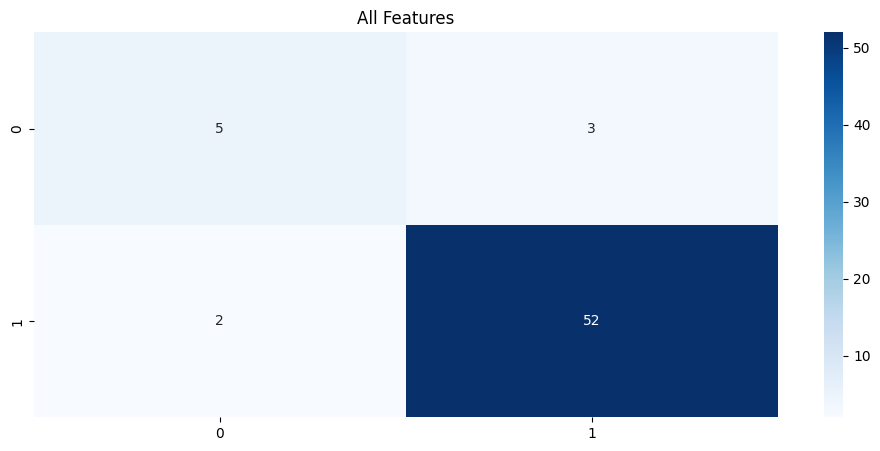

In [47]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

model = LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs')

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("\nCross-validation scores on all features:")
print(cv_scores)
print(f"Mean CV Accuracy (All Features): {np.mean(cv_scores):.4f}")

model.fit(X_train, y_train)
y_pred_all = model.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"\nAccuracy on test data (All Features): {accuracy_all:.4f}")

print("\nConfusion Matrix (All Features):")
print(confusion_matrix(y_test, y_pred_all))

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

sns.heatmap(confusion_matrix(y_test, y_pred_all), annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_title('All Features')
plt.show()

In [49]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.94


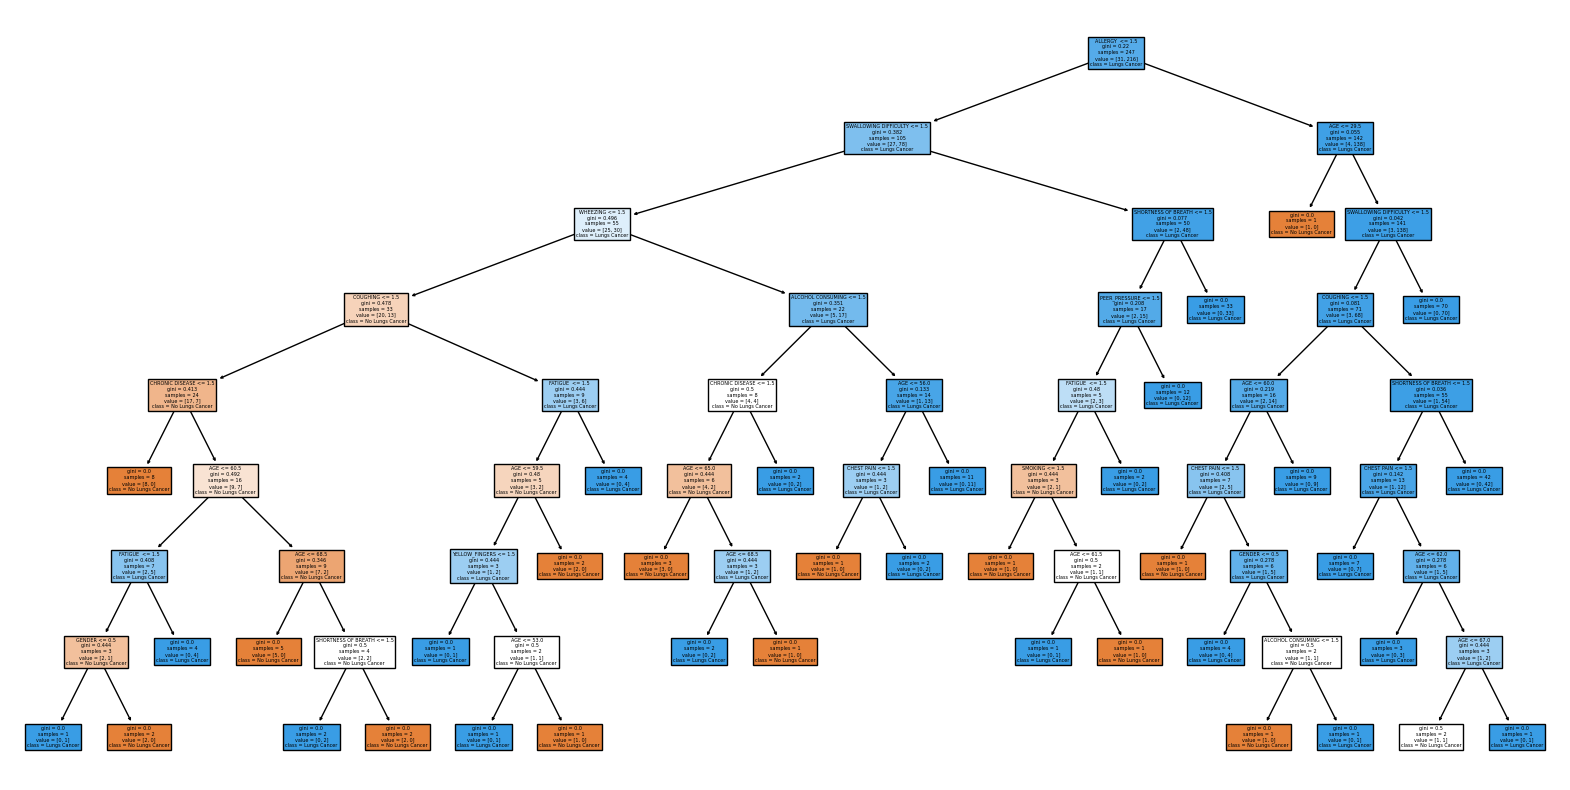

Confusion Matrix:
[[ 4  4]
 [ 4 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.93      0.93      0.93        54

    accuracy                           0.87        62
   macro avg       0.71      0.71      0.71        62
weighted avg       0.87      0.87      0.87        62


Accuracy Score:
0.8709677419354839


In [52]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

clf = DecisionTreeClassifier(random_state=105)

clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Lungs Cancer', 'Lungs Cancer'], filled=True) # Use X.columns and define class names
plt.show()

y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

In [53]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

rf_model = RandomForestClassifier(n_estimators=1000, random_state=110)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest Model Accuracy: {accuracy:.2f}')

importances = rf_model.feature_importances_
feature_names = X.columns
for feature, importance in zip(feature_names, importances):
    print(f'Feature: {feature}, Importance: {importance:.4f}')

Random Forest Model Accuracy: 0.90
Feature: GENDER, Importance: 0.0323
Feature: AGE, Importance: 0.2161
Feature: SMOKING, Importance: 0.0334
Feature: YELLOW_FINGERS, Importance: 0.0688
Feature: ANXIETY, Importance: 0.0463
Feature: PEER_PRESSURE, Importance: 0.0464
Feature: CHRONIC DISEASE, Importance: 0.0580
Feature: FATIGUE , Importance: 0.0492
Feature: ALLERGY , Importance: 0.0935
Feature: WHEEZING, Importance: 0.0649
Feature: ALCOHOL CONSUMING, Importance: 0.0707
Feature: COUGHING, Importance: 0.0552
Feature: SHORTNESS OF BREATH, Importance: 0.0421
Feature: SWALLOWING DIFFICULTY, Importance: 0.0879
Feature: CHEST PAIN, Importance: 0.0354


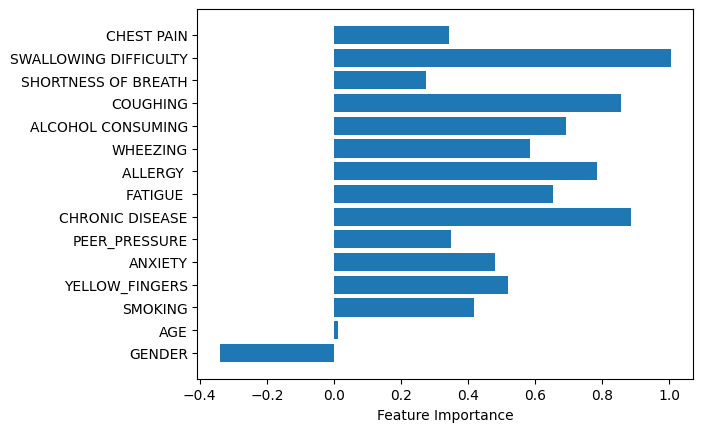

In [60]:
importances = model.coef_[0]

# Get feature names
feature_names = df.columns[:-1]  # Assuming the last column is the target

# Create a horizontal bar plot
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.show()